# Исследование объявлений о продаже квартир

В распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Задача исследования — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

## 1.Ознакомление с файлом

In [72]:
import pandas as pd #импортируем библиотеку pandas
data = pd.read_csv('real_estate_data.csv', sep='\t') #считаем csv-файл
data.head(20) #выводим на экран первые 20 строк

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### 1.1 Вывод основной информации о датафрейме

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### 1.2 Построение гистограмм по каждому столбцу

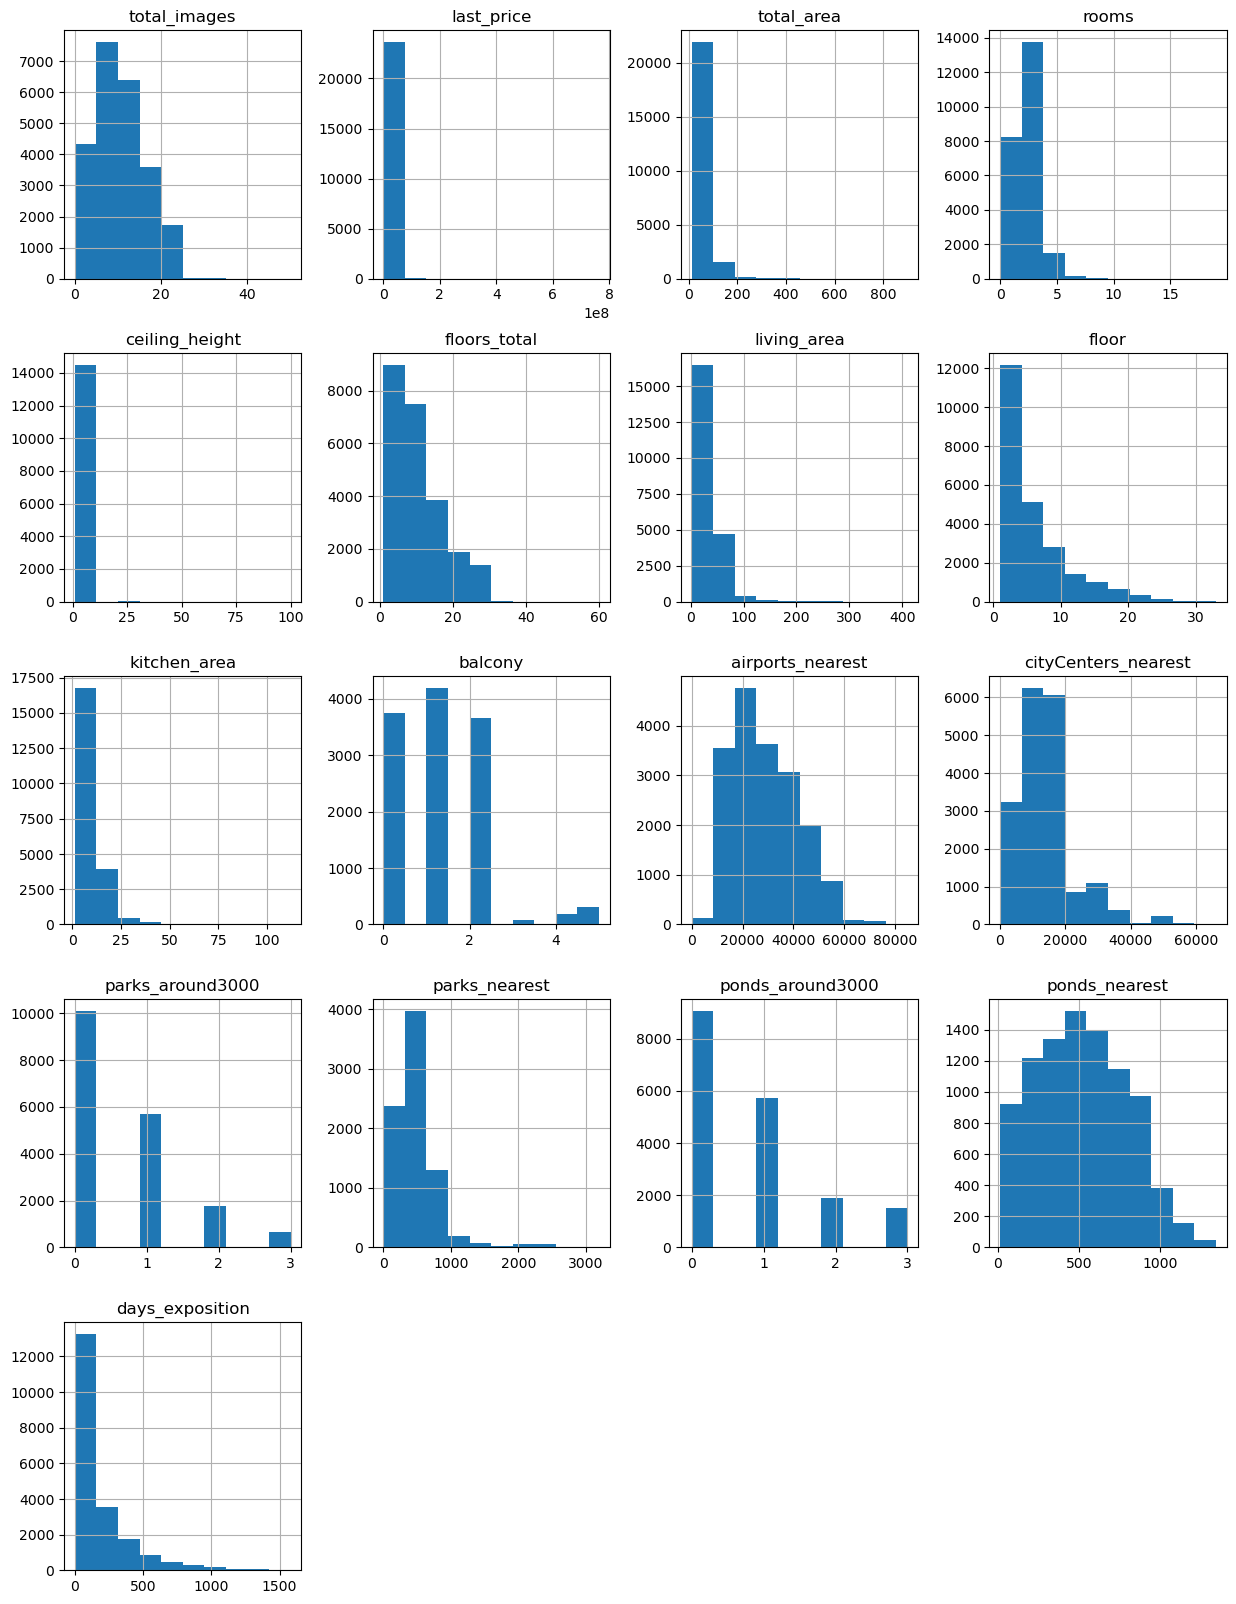

In [74]:
import matplotlib.pyplot as plt #импортируем библиотеку matplotlib
data.hist(figsize=(15,20)) #построение гистограмм
plt.show() #вывод гистограмм на экран

В ходе знакомства с данными были обнаружены пропуски в 12 столбцах. Так же в 6 столбцах неправильно указан тип данных. Все это изменим в предобработке данных. Так же в предобработке данных после изменения или удаления пропусков и изменения типов данных рассмотрим по отдельности на гистограмме значения каждого столбца, чтоб понять есть выбросы в данных или нет

## 2 Предобработка данных

### 2.1 Поиск и изучение пропущенных значений в столбцах

In [75]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропуски были обнаружены в 14 столбцах:  ceiling_height, floors_total, living_area, is_apartament, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition. 

Пропуски в days_exposition появились скорее всего из-за того,что объявляение еще размещено на сайте, т.е. публикация еще не снята.

In [76]:
#изменение названия столбца
data=data.rename(columns={'cityCenters_nearest':'city_centers_nearest'})#изменение названия, на змеиный регистр

### 2.2 Удаление пропусков

Пропуски в floors_total можно удалить, так как их очень мало по отношению к данным. Так же можно удалить пропуски в locality_name

In [77]:
#удаление пропусков
data=data.dropna(subset=['floors_total']).reset_index(drop=True)
data=data.dropna(subset=['locality_name']).reset_index(drop=True)

Пропуски в balcony могут означать, что балкона нет в данной недвижимости. Поэтому заменим пропуски на 0.

In [78]:
#замена пропущенных значений на 0
data['balcony']=data['balcony'].fillna(0)

Пропуски в parks_around3000 и ponds_around3000 одинакового количества( 5518 пропусков) и индексация у них совпадает. Так как у нас нет точных данных по числу парков и прудов на расстоянии 3 км от недвижимости, то заменим пропуски на 0, тк их нет в радиусе 3 км

In [79]:
#замена пропущеннх значений на 0
data['ponds_around3000']=data['ponds_around3000'].fillna(0)
data['parks_around3000']=data['parks_around3000'].fillna(0)

Чтоб убрать пропуски в is_apartment заменим пропуски на False.

In [80]:
#замена пропущенных значений на False
data['is_apartment']=data['is_apartment'].fillna(False)

Удалить пропуски в days_exposition мы не можем, так как они означают, что недвижимость еще находится в продаже, да и таких данных много.

### 2.3 Изменение типов данных

In [81]:
#изменение типов данных
data['floors_total']=data['floors_total'].astype('int32')
data['balcony']=data['balcony'].astype('int32')
data['parks_around3000']=data['parks_around3000'].astype('int32')
data['ponds_around3000']=data['ponds_around3000'].astype('int32')
data['is_apartment']=data['is_apartment'].astype('bool')
data['first_day_exposition']=pd.to_datetime(data['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')

Данные были изменены в балконах и количестве этажей с float на int, так как они не могут иметь дробное значение.
А данные о первом дне размещении объявления были изменены с типа object на datetime, чтоб удобно было в будущем проводить анализ данных.

In [82]:
data.info() #проверка изменений типов данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  int32         
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

### 2.4 Устранения неявных дубликатов

Неявные дубликаты были найдены в столбце с названием населенных пунктов. Посмотрим какие названия повторяются и очистим список от дубликатов.

In [83]:
data['locality_name'].sort_values().unique() #вывод уникальных значений в алфавитном порядке

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Чтоб не было дубликатов, уберем все пробелы и характеристики населенного пункта из названий, оставим только одно название населенного пункта.

In [84]:
duplicate=['посёлок','поселок','поселок городского типа','посёлок городского типа','садоводческое некоммерческое товарищество',
           'садовое товарищество','посёлок при железнодорожной станции','посёлок станции','деревня','село','коттеджный',
           'пгт','садоводческое товарищество','имени','станции','городской поселок','городской посёлок','городского типа',
          'городской','при железнодорожной',' ']
data['locality_name']=data['locality_name'].replace(to_replace = duplicate, value='', regex=True)

In [85]:
data['locality_name'].sort_values().unique() #проверка изменений неявных дубликатов

array(['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро',
       'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'БольшаяВруда', 'БольшаяИжора',
       'БольшаяПустомержа', 'БольшиеКолпаны', 'БольшоеРейзино',
       'БольшойСабск', 'Бор', 'БорисоваГрива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'ВахноваКара', 'Вещево',
       'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'ДружнаяГорка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жил', 'Жилгородок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород', 'Извара', 'Ильичёво', 'И

### 2.5 Удаление пропусков, с помощью медианы значений, зависящих от населенного пункта

Удаление пропусков в расстоянии до аэропорта

In [86]:
import warnings 
warnings.filterwarnings("ignore") #убрать красные текстовые предупреждения

In [87]:
for ind in data['locality_name'].unique(): 
    data.loc[(data['locality_name']==ind)&(data['airports_nearest'].isna()),'airports_nearest']=\
    data.loc[(data['locality_name']==ind),'airports_nearest'].median()

Удаление пропусков в расстоянии до центра города

In [88]:
for ind in data['locality_name'].unique(): 
    data.loc[(data['locality_name']==ind)&(data['city_centers_nearest'].isna()),'city_centers_nearest']=\
    data.loc[(data['locality_name']==ind),'city_centers_nearest'].median()

Удаление пропусков в расстоянии до ближайшего парка

In [89]:
for ind in data['locality_name'].unique(): 
    data.loc[(data['locality_name']==ind)&(data['parks_nearest'].isna()),'parks_nearest']=\
    data.loc[(data['locality_name']==ind),'parks_nearest'].median()

Удаление пропусков в расстоянии до ближайших водоемов

In [90]:
for ind in data['locality_name'].unique(): 
    data.loc[(data['locality_name']==ind)&(data['ponds_nearest'].isna()),'ponds_nearest']=\
    data.loc[(data['locality_name']==ind),'ponds_nearest'].median()

In [91]:
data.isna().sum() #проверка изменения пропусков

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height          9084
floors_total               0
living_area             1865
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area            2222
balcony                    0
locality_name              0
airports_nearest        5432
city_centers_nearest    5432
parks_around3000           0
parks_nearest           5986
ponds_around3000           0
ponds_nearest           5517
days_exposition         3171
dtype: int64

Количество пропусков значительно уменьшилось, удалить данные, где нет расстояния до аэропорта, центра города, парка и водоема мы не можем, так как это значительное количество данных. Остальные пропуски будем удалять по ходу дальнейшего анализа.

### 2.6 Поиск и устранение выбивающихся аномалий в столбцах

Чтоб увидеть выбивающиеся значения посмотрим числовое описание по всем столбцам

In [92]:
data.describe() #числовое описание всех данных

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,14481.000000,23565.000000,21700.000000,23565.000000,21343.000000,23565.000000,18133.000000,18133.000000,23565.000000,17579.000000,23565.000000,18048.000000,20394.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.771283,10.675875,34.454822,5.878124,10.560994,0.593677,28788.533971,14195.267882,0.468831,475.895244,0.589900,510.622257,180.741395
std,5.681156,1.091093e+07,35.657060,1.078591,1.261983,6.594823,22.045359,4.871485,5.900630,0.960660,12606.251799,8610.213514,0.748403,234.981831,0.883966,199.869658,219.732782
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.510000,5.000000,18.600000,2.000000,7.000000,0.000000,18590.000000,9265.000000,0.000000,433.000000,0.000000,466.000000,45.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26763.000000,13073.000000,0.000000,460.000000,0.000000,504.000000,95.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37227.000000,16275.000000,1.000000,460.000000,1.000000,563.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Стандартное отклонение сильно отличается от среднего арифметического значения в большинстве данных. 
Данные в total_images нам не интересны, поэтому их изменять ну будем. 
Для начала проанализируем и изменим данные в ceiling_height, так как вряд ли есть квартиры с потолками в 100 м. Возможно указали неправильные данные(вместо м., указали см.). Для этого сделаем срез данных, где если высота потолков больше 20 м., то делим высоту на 10.

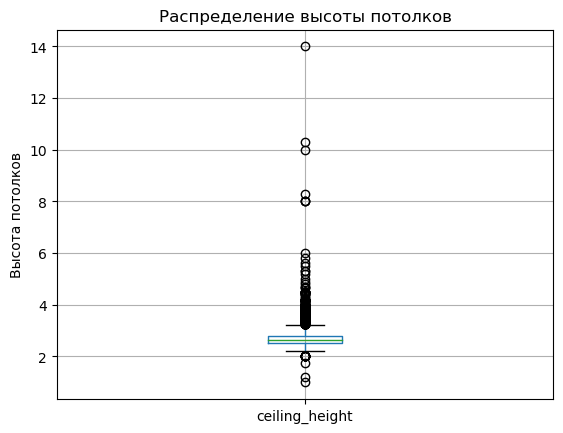

In [93]:
data['ceiling_height']=data['ceiling_height'].where(data['ceiling_height'] <20,data['ceiling_height']/10) #изменим см на м
data.boxplot(column='ceiling_height') #построение диаграммы размаха
plt.ylabel('Высота потолков')
plt.title('Распределение высоты потолков')
plt.show()

По диаграммме размаха видно, что есть выбросы по высоте потолков, начиная с 3 м., примерно. Так же мы видим, что большие значания в единичном количестве начинаются от 5м.,примерно. Для начала уберем все пропуски в столбце ceiling_height. Для этого мы будем искать медиану по высоте потолков, которые находятся на одном этаже. Затем построим новую диаграмму размаха.

In [94]:
for ind in data['floors_total'].unique(): 
    data.loc[(data['floors_total']==ind)&(data['ceiling_height'].isna()),'ceiling_height']=\
    data.loc[(data['floors_total']==ind),'ceiling_height'].median()
data['ceiling_height'].unique()#с помощью цикла заменили пропуски медианым значением

array([ 2.7 ,  2.75,  2.55,  2.6 ,  3.03,  2.65,  2.66,  2.5 ,  2.67,
        2.56,  3.  ,  3.05,  2.8 ,  2.9 ,  3.2 ,  2.61,  3.25,  3.45,
        2.77,  2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,
        2.47,  2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,
        2.51,  2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.59,
        2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,  3.55,
        3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,  5.  ,
        2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,  4.7 ,
        2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,  2.3 ,
        3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,  3.95,
        3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,  3.24,
        4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,  3.09,
        8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,  2.68,
        3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,  3.32,
        1.2 ,  8.3 ,

In [95]:
data.isna().sum() #проверка устранения пропусков

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             1
floors_total               0
living_area             1865
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area            2222
balcony                    0
locality_name              0
airports_nearest        5432
city_centers_nearest    5432
parks_around3000           0
parks_nearest           5986
ponds_around3000           0
ponds_nearest           5517
days_exposition         3171
dtype: int64

Пропуски заменены на медиану, теперь можно посмотреть как изменилась диаграмма размаха и какая теперь гистрограмма

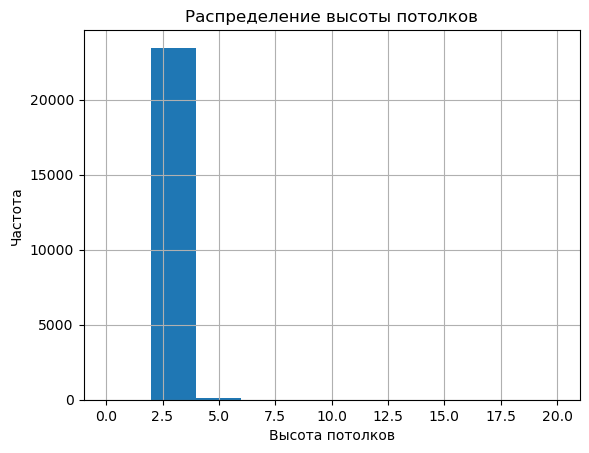

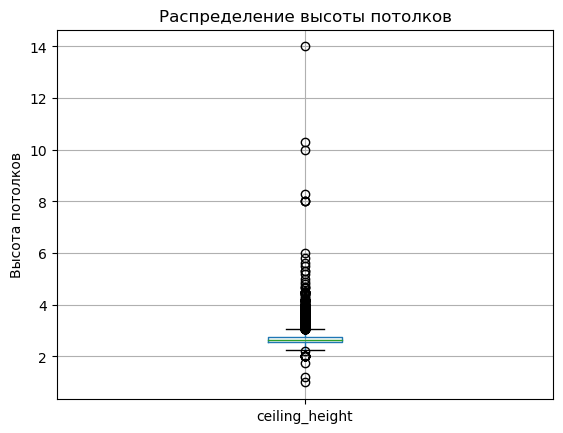

In [96]:
data.hist('ceiling_height',bins=10,range=(0,20)) #построение гистрограммы
plt.xlabel('Высота потолков')
plt.ylabel('Частота')
plt.title('Распределение высоты потолков')
plt.show()
data.boxplot(column='ceiling_height') #построение диаграммы размаха высоты потолков
plt.ylabel('Высота потолков')
plt.title('Распределение высоты потолков')
plt.show()

Теперь из данных видно, что нижний ус почти упирается в 2 метра, а верхний, примерно, в 3 метра, остальное можно считать выбросами.
Теперь можно отредактировать эти данные, убрав значения высоты, которые меньше 2.3м.(ниже высота потолков является нарушением  норм) и меньше 5м., так как после совсем единичные значения, если судить по гистограмме.

In [97]:
data=data.query('2.3 < ceiling_height <= 5') #делаем срез данных

Теперь изучим общую площадь.

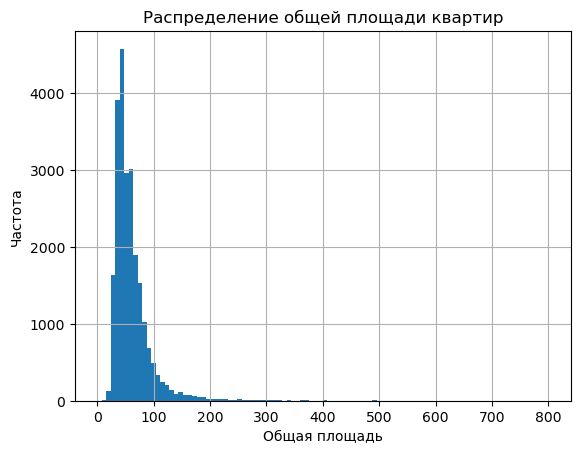

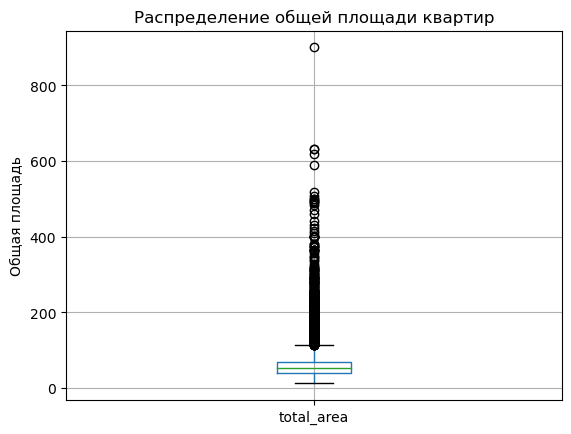

In [98]:
data.hist('total_area',bins=100,range=(0,800)) #построение гистрограммы
plt.ylabel('Частота')
plt.xlabel('Общая площадь')
plt.title('Распределение общей площади квартир')
plt.show()
data.boxplot(column='total_area') #вывод диаграммы размаха общей площади
plt.ylabel('Общая площадь')
plt.title('Распределение общей площади квартир')
plt.show()   

Нижний ус упирается почти в 0, ведь минимальное значение 12 кв.м., а верхний ус чуть больше 100 кв.м.. Это все ориентировочная граница нормального размаха. Видно,что более высокие значения сливаются в одну жирную линию и самые высокие отображены точками,таких значений много. И все же, значения,которые отсек верхний ус-редки. Сделаем срез данных, где площадь <200 кв.м., так как по гистограмме видно, что после 200 кв.м. совсем единисные случаи, где площадь больше

In [99]:
data= data.query('12<total_area <= 200') #делаем срез данных
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23304.000000,2.330400e+04,23304.000000,23304.000000,23304.000000,23304.000000,21470.000000,23304.000000,21118.000000,23304.000000,17889.000000,17889.00000,23304.000000,17336.000000,23304.000000,17805.000000,20190.000000
mean,9.855175,6.019484e+06,58.153318,2.034844,2.702788,10.718074,33.243899,5.887058,10.378330,0.595391,28819.689837,14286.30597,0.461251,476.316192,0.582733,511.798792,179.622437
std,5.664716,6.202784e+06,26.501530,0.995585,0.220956,6.600836,17.350791,4.878864,5.364198,0.960802,12656.807590,8597.56250,0.739834,234.904109,0.878307,199.240920,218.417066
min,0.000000,1.219000e+04,13.000000,0.000000,2.340000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.00000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.550000,5.000000,18.600000,2.000000,7.000000,0.000000,18539.000000,9442.00000,0.000000,435.000000,0.000000,471.000000,45.000000
50%,9.000000,4.600000e+06,51.700000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26763.000000,13145.00000,0.000000,460.000000,0.000000,504.000000,95.000000
75%,14.000000,6.700000e+06,68.800000,3.000000,2.750000,16.000000,42.000000,8.000000,11.972500,1.000000,37310.000000,16299.00000,1.000000,460.000000,1.000000,563.000000,229.000000
max,50.000000,3.300000e+08,200.000000,11.000000,5.000000,60.000000,164.700000,33.000000,93.200000,5.000000,84869.000000,65968.00000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Мы убрали лишние значения в высоте потолков и общей площади. Теперь изучим данные в living_area. Для начала уберем пропуски (1834  пропуска) в данных с помощью медианы жилой площади, которую найдем по общей площади квартиры

In [100]:
for ind in data['total_area'].unique(): 
    data.loc[(data['total_area']==ind)&(data['living_area'].isna()),'living_area']=\
    data.loc[(data['total_area']==ind),'living_area'].median()
data['living_area'].unique()

array([51.  , 18.6 , 34.3 , ..., 31.65, 13.59, 42.55])

In [101]:
data.isna().sum() # проверка устранения пропусков

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area              115
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area            2186
balcony                    0
locality_name              0
airports_nearest        5415
city_centers_nearest    5415
parks_around3000           0
parks_nearest           5968
ponds_around3000           0
ponds_nearest           5499
days_exposition         3114
dtype: int64

Осталось 115 пропусков, это не критичное количество, поэтому эти пропуски можно будет удалить.

In [102]:
data=data.dropna(subset=['living_area']).reset_index(drop=True) #удаление пропущенных значений

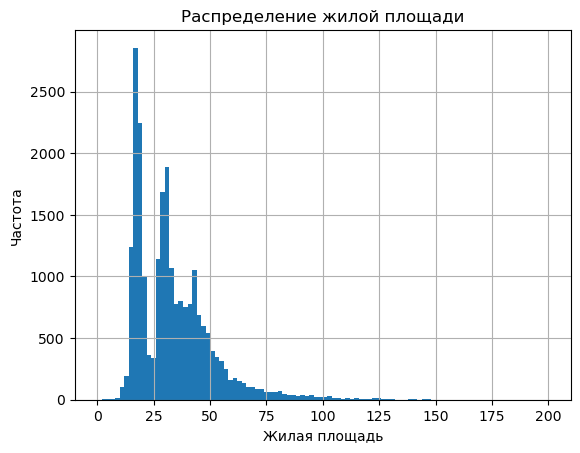

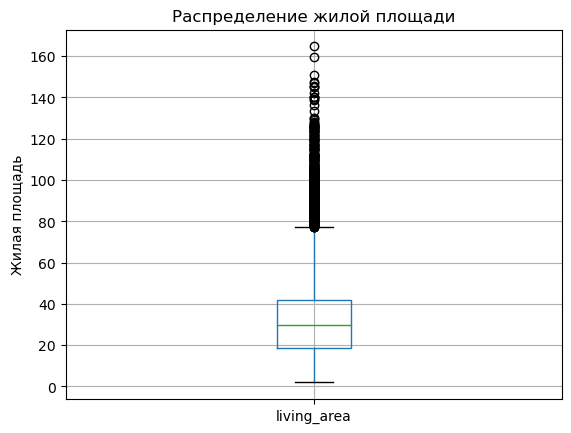

In [103]:
data.hist('living_area',bins=100,range=(0,200)) #построение гистрограммы
plt.ylabel('Частота')
plt.xlabel('Жилая площадь')
plt.title('Распределение жилой площади')
plt.show()
data.boxplot(column='living_area') #вывод диаграммы размаха жилой площади
plt.ylabel('Жилая площадь')
plt.title('Распределение жилой площади')
plt.show() 

В последнем описании числовых данных было видно, что минимальное значение 2, что явяется нарушением норм, тк согласно требованиям, жилая площадь должна быть не меньше 8 кв.м. Так же на диаграмме размаха видны выбросы после 80 кв.м.. По гистрограмме видны еще площади в 125 кв.м., но они единичны, поэтому сделаем срез данных от 8 кв.м. до 100 кв.м..

In [104]:
data=data.query('8 < living_area <= 100') #делаем срез данных

Чтоб было удобнее дальше изучать данные, округлим данные в last_price до миллиона.

In [105]:
data['last_price']=data['last_price'].where(data['last_price'] <0,data['last_price']/1000000) #округлим все значения до млн.
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,22991.000000,22991.000000,22991.000000,22991.000000,22991.000000,22991.000000,22991.000000,22991.000000,20859.000000,22991.000000,17617.000000,17617.000000,22991.000000,17066.000000,22991.000000,17534.000000,19947.000000
mean,9.855770,5.860912,57.189657,2.011091,2.699274,10.717281,32.643009,5.886042,10.299967,0.595581,28841.513453,14388.134898,0.456135,476.392300,0.576095,512.574912,178.871961
std,5.655854,5.861742,24.463189,0.955790,0.216962,6.598912,15.704433,4.880323,5.282946,0.959006,12710.104305,8590.579460,0.735288,234.493297,0.872633,198.299664,217.655725
min,0.000000,0.012190,13.000000,0.000000,2.340000,1.000000,8.300000,1.000000,1.300000,0.000000,0.000000,208.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000,40.000000,1.000000,2.550000,5.000000,18.500000,2.000000,7.000000,0.000000,18463.000000,9626.000000,0.000000,435.000000,0.000000,473.000000,44.500000
50%,9.000000,4.600000,51.200000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26803.000000,13217.000000,0.000000,460.000000,0.000000,504.000000,94.000000
75%,14.000000,6.599000,68.000000,3.000000,2.750000,16.000000,42.000000,8.000000,11.780000,1.000000,37406.000000,16376.000000,1.000000,460.000000,1.000000,564.000000,228.000000
max,50.000000,330.000000,200.000000,7.000000,5.000000,60.000000,100.000000,33.000000,93.200000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Минимальное значение в стоимости 12 190 рублей, что невозможно. Построим диаграмму размаха и посмотрим какие еще выбросы есть

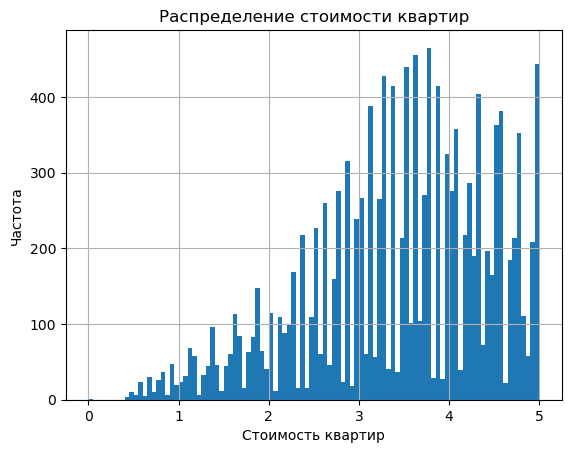

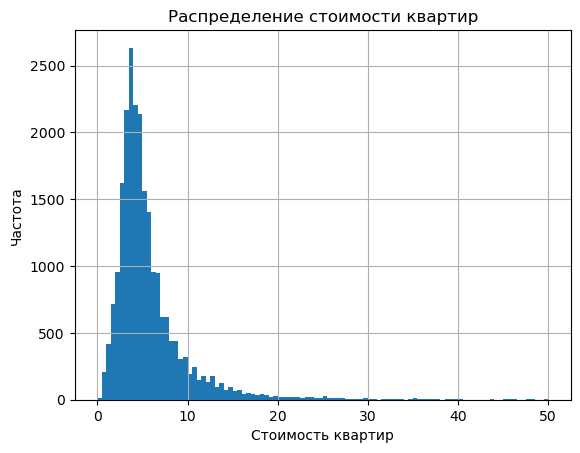

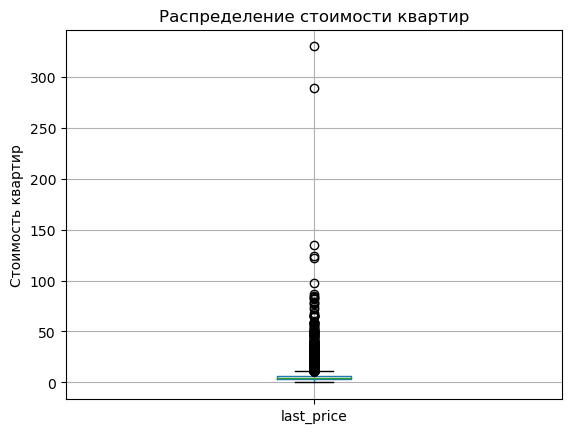

In [106]:
data.hist('last_price',bins=100,range=(0,5)) #построение гистрограммы
plt.ylabel('Частота')
plt.xlabel('Стоимость квартир')
plt.title('Распределение стоимости квартир')
plt.show()
data.hist('last_price',bins=100,range=(0,50)) #построение гистрограммы
plt.ylabel('Частота')
plt.xlabel('Стоимость квартир')
plt.title('Распределение стоимости квартир')
plt.show()
data.boxplot(column='last_price') #вывод диаграммы размаха последней цены
plt.ylabel('Стоимость квартир')
plt.title('Распределение стоимости квартир')
plt.show() 

Единичные значения идут после 26 млн. рублей, уберем их из данных для изучения. Так же видно, что значения начинают свой рост, примерно, от 500 тыс.рублей. Поэтому сделаем срез данных между 500 тыс.руб. и 26 млн. руб..

In [107]:
data=data.query('0.5 < last_price <= 26') #срез данных
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,22761.000000,22761.000000,22761.000000,22761.000000,22761.000000,22761.000000,22761.000000,22761.000000,20651.000000,22761.000000,17404.000000,17404.000000,22761.000000,16854.000000,22761.000000,17322.000000,19779.000000
mean,9.834893,5.517623,56.494750,2.000791,2.696461,10.738236,32.309145,5.890602,10.159997,0.595668,28859.656717,14489.937859,0.447740,477.134152,0.566144,513.624668,177.978513
std,5.637908,3.527395,23.259614,0.949979,0.214191,6.614293,15.261981,4.888869,4.875296,0.957854,12772.161674,8581.416326,0.726358,233.350972,0.862789,197.949022,216.607707
min,0.000000,0.520000,13.000000,0.000000,2.340000,1.000000,8.300000,1.000000,1.300000,0.000000,0.000000,208.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000,40.000000,1.000000,2.550000,5.000000,18.500000,2.000000,7.000000,0.000000,18417.750000,9813.250000,0.000000,435.000000,0.000000,474.000000,44.000000
50%,9.000000,4.550000,51.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26833.500000,13261.000000,0.000000,460.000000,0.000000,504.000000,94.000000
75%,14.000000,6.500000,67.400000,3.000000,2.750000,16.000000,41.400000,8.000000,11.600000,1.000000,37412.000000,16432.000000,1.000000,460.000000,1.000000,564.000000,226.500000
max,50.000000,26.000000,200.000000,7.000000,5.000000,60.000000,100.000000,33.000000,65.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Заполним пропуски в kitchen_area медианым значением, ориентируясь на общую площадь

In [108]:
for ind in data['total_area'].unique(): 
    data.loc[(data['total_area']==ind)&(data['kitchen_area'].isna()),'kitchen_area']=\
    data.loc[(data['total_area']==ind),'kitchen_area'].median()

In [109]:
data.isna().sum()#проверка устранения пропусков

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area             140
balcony                    0
locality_name              0
airports_nearest        5357
city_centers_nearest    5357
parks_around3000           0
parks_nearest           5907
ponds_around3000           0
ponds_nearest           5439
days_exposition         2982
dtype: int64

Осталось 140 пропусков, это не критично, поэтому их можно будет удалить

In [110]:
data=data.dropna(subset=['kitchen_area']).reset_index(drop=True) #удаление пропущенных значений

In [111]:
data.isna().sum() #проверка пропусков в площади кухни

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest        5291
city_centers_nearest    5291
parks_around3000           0
parks_nearest           5841
ponds_around3000           0
ponds_nearest           5373
days_exposition         2978
dtype: int64

Теперь для изучения выбросов простроим гистрограмму и диаграмму размаха

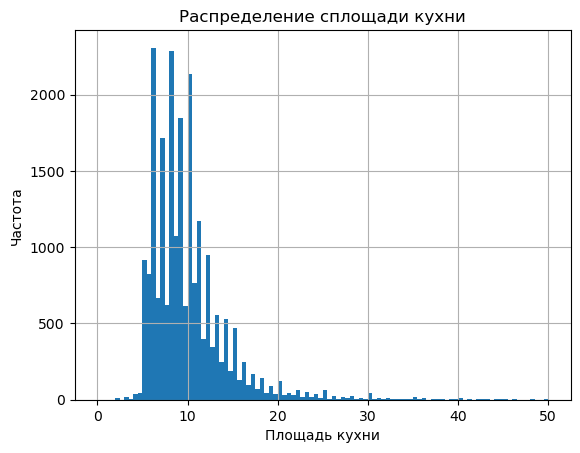

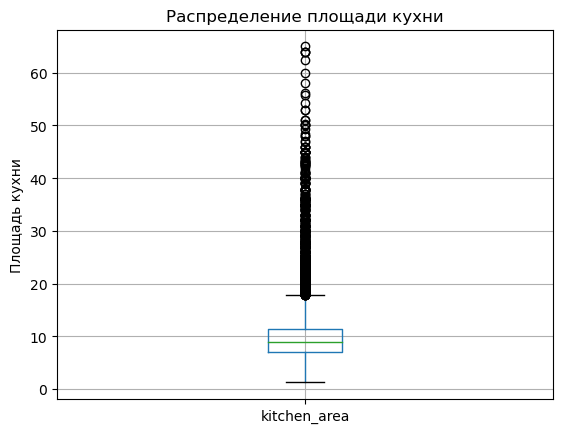

In [112]:
data.hist('kitchen_area',bins=100,range=(0,50)) #построение гистрограммы
plt.ylabel('Частота')
plt.xlabel('Площадь кухни')
plt.title('Распределение сплощади кухни')
plt.show()
data.boxplot(column='kitchen_area') #вывод диаграммы размаха площади кухни
plt.ylabel('Площадь кухни')
plt.title('Распределение площади кухни')
plt.show() 

Минимальное количество площади кухни 1.3 кв.м., что кажется нереальным, ведь минимальная площадь кухни по нормам от 5 кв.м.. Так же верхний ус доходит до 18,примерно. Редкие значения начинаются после 35 кв.м., примерно. Теперь можно почистить данные и округлить их до целых чисел, чтоб было дальше проводить анализ

In [113]:
data=data.query('5 < kitchen_area <= 35').reset_index(drop=True) #срез данных
data['kitchen_area']=round(data['kitchen_area'])

In [114]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,21953.000000,21953.000000,21953.000000,21953.000000,21953.000000,21953.000000,21953.000000,21953.000000,21953.000000,21953.000000,16865.000000,16865.000000,21953.000000,16335.000000,21953.000000,16788.000000,19080.000000
mean,9.866670,5.526154,56.770908,2.012299,2.696396,10.788867,32.463224,5.904523,9.987519,0.598643,28915.351734,14428.480136,0.448139,477.818549,0.565709,513.864189,177.995807
std,5.644765,3.428403,22.767810,0.944252,0.213966,6.591102,15.260610,4.881270,4.076642,0.961225,12745.835427,8454.204715,0.725398,233.785780,0.861951,197.154975,215.981864
min,0.000000,0.520000,20.000000,0.000000,2.340000,1.000000,8.300000,1.000000,5.000000,0.000000,0.000000,208.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.450000,40.000000,1.000000,2.550000,5.000000,18.600000,2.000000,7.000000,0.000000,18446.000000,9857.000000,0.000000,435.000000,0.000000,474.000000,45.000000
50%,9.000000,4.600000,51.600000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26941.000000,13263.000000,0.000000,460.000000,0.000000,504.000000,94.000000
75%,14.000000,6.500000,67.800000,3.000000,2.750000,16.000000,41.800000,8.000000,11.000000,1.000000,37434.000000,16366.000000,1.000000,460.000000,1.000000,564.000000,228.000000
max,50.000000,26.000000,200.000000,7.000000,5.000000,60.000000,100.000000,33.000000,35.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


В ходе проделанной работы были удалены пропуски в столбцах, где это возможно. Так же были сделаны срезы данных, в которых мы убрали аномалии. Остались 4 столбца с расстояниями, где остались пропуски, так как их убрать нельзя. Всего мы убрали 8% лишней информации

## 3 Подсчет и добавление в таблицу новых столбцов

### 3.1 Посчитаем и добавим новый столбец, в котором будет указана цена за 1 кв.м..

In [115]:
#создание нового столбца
data['one_price_m']=round(data['last_price']/data['total_area']*100000)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_price_m
0,20,13.000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,12037.0
1,7,3.350,40.40,2018-12-04,1,2.75,11,18.60,1,False,...,2,Шушары,12817.0,18603.0,0,NaN,0,584.5,81.0,8292.0
2,10,5.196,56.00,2015-08-20,2,2.55,5,34.30,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,9279.0
3,10,2.890,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,0,Янино-1,NaN,NaN,0,NaN,0,NaN,55.0,9507.0
4,6,3.700,37.30,2017-11-02,1,2.66,26,10.60,6,False,...,1,Парголово,52996.0,19143.0,0,733.0,0,593.0,155.0,9920.0
5,5,7.915,71.60,2019-04-18,2,2.75,24,44.30,22,False,...,2,Санкт-Петербург,23982.0,11634.0,0,460.0,0,504.0,NaN,11054.0
6,20,2.900,33.16,2018-05-23,1,2.70,27,15.43,26,False,...,0,Мурино,NaN,NaN,0,NaN,0,NaN,189.0,8745.0
7,18,5.400,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,2,Санкт-Петербург,50898.0,15008.0,0,460.0,0,504.0,289.0,8852.0
8,5,5.050,39.60,2017-11-16,1,2.67,12,20.30,3,False,...,0,Санкт-Петербург,38357.0,13878.0,1,310.0,2,553.0,137.0,12753.0
9,9,3.300,44.00,2018-08-27,2,2.55,5,31.00,4,False,...,1,Ломоносов,48252.0,51677.0,0,407.0,0,553.0,7.0,7500.0


In [116]:
data['one_price_m'].value_counts().head(10)  #вывод количества публикаций по стоимости 1 кв.м.. в порядке убывания

10000.0    247
8333.0      66
7500.0      57
6667.0      51
12500.0     50
8000.0      47
5000.0      46
9000.0      45
11667.0     39
9375.0      37
Name: one_price_m, dtype: int64

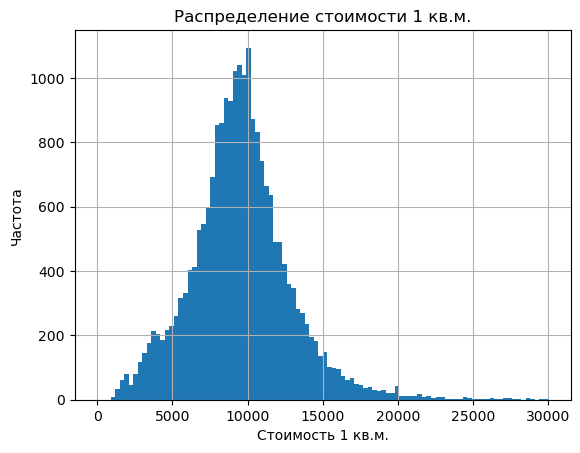

In [117]:
data['one_price_m'].hist(bins=100, range=(0, 30000))
plt.ylabel('Частота')
plt.xlabel('Стоимость 1 кв.м.')
plt.title('Распределение стоимости 1 кв.м.')
plt.show()

Мы сделали новый столбец со стоиомстью 1 кв.м. и округлили до целого числа. 

По данным можно сделать вывод, что распределение по гистиграмме- нормальное. Это значит, что чаще всего встречаются среднее значение и близкие к нему, а крайние значения встречаются редко. Чаще всего люди ставят стоимость 10 000 руб. за 1 кв.м.. Но для конечных выводов нужно изучить факторы, которые влияют на стоимость, это мы сделаем в 4 пунтке нашего анализа.

### 3.2 Посчитаем и добавим новый столбец, в котором будет указан день недели созданного объявления

In [118]:
#создание нового столбца
data['day']=data['first_day_exposition'].dt.weekday
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_price_m,day
0,20,13.000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,12037.0,3
1,7,3.350,40.40,2018-12-04,1,2.75,11,18.60,1,False,...,Шушары,12817.0,18603.0,0,NaN,0,584.5,81.0,8292.0,1
2,10,5.196,56.00,2015-08-20,2,2.55,5,34.30,4,False,...,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,9279.0,3
3,10,2.890,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,Янино-1,NaN,NaN,0,NaN,0,NaN,55.0,9507.0,0
4,6,3.700,37.30,2017-11-02,1,2.66,26,10.60,6,False,...,Парголово,52996.0,19143.0,0,733.0,0,593.0,155.0,9920.0,3
5,5,7.915,71.60,2019-04-18,2,2.75,24,44.30,22,False,...,Санкт-Петербург,23982.0,11634.0,0,460.0,0,504.0,NaN,11054.0,3
6,20,2.900,33.16,2018-05-23,1,2.70,27,15.43,26,False,...,Мурино,NaN,NaN,0,NaN,0,NaN,189.0,8745.0,2
7,18,5.400,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,Санкт-Петербург,50898.0,15008.0,0,460.0,0,504.0,289.0,8852.0,6
8,5,5.050,39.60,2017-11-16,1,2.67,12,20.30,3,False,...,Санкт-Петербург,38357.0,13878.0,1,310.0,2,553.0,137.0,12753.0,3
9,9,3.300,44.00,2018-08-27,2,2.55,5,31.00,4,False,...,Ломоносов,48252.0,51677.0,0,407.0,0,553.0,7.0,7500.0,0


### 3.3 Посчитаем и добавим новый столбец, в котором будет указан месяц публикации объявления

In [119]:
#создание нового столбца
data['month']=data['first_day_exposition'].dt.month
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_price_m,day,month
0,20,13.000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,18863.0,16028.0,1,482.0,2,755.0,NaN,12037.0,3,3
1,7,3.350,40.40,2018-12-04,1,2.75,11,18.60,1,False,...,12817.0,18603.0,0,NaN,0,584.5,81.0,8292.0,1,12
2,10,5.196,56.00,2015-08-20,2,2.55,5,34.30,4,False,...,21741.0,13933.0,1,90.0,2,574.0,558.0,9279.0,3,8
3,10,2.890,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,NaN,NaN,0,NaN,0,NaN,55.0,9507.0,0,9
4,6,3.700,37.30,2017-11-02,1,2.66,26,10.60,6,False,...,52996.0,19143.0,0,733.0,0,593.0,155.0,9920.0,3,11
5,5,7.915,71.60,2019-04-18,2,2.75,24,44.30,22,False,...,23982.0,11634.0,0,460.0,0,504.0,NaN,11054.0,3,4
6,20,2.900,33.16,2018-05-23,1,2.70,27,15.43,26,False,...,NaN,NaN,0,NaN,0,NaN,189.0,8745.0,2,5
7,18,5.400,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,50898.0,15008.0,0,460.0,0,504.0,289.0,8852.0,6,2
8,5,5.050,39.60,2017-11-16,1,2.67,12,20.30,3,False,...,38357.0,13878.0,1,310.0,2,553.0,137.0,12753.0,3,11
9,9,3.300,44.00,2018-08-27,2,2.55,5,31.00,4,False,...,48252.0,51677.0,0,407.0,0,553.0,7.0,7500.0,0,8


### 3.4 Посчитаем и добавим новый столбец, в котором будет указан год публикации объявления

In [120]:
#создание нового столбца
data['year']=data['first_day_exposition'].dt.year
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_price_m,day,month,year
0,20,13.000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,16028.0,1,482.0,2,755.0,NaN,12037.0,3,3,2019
1,7,3.350,40.40,2018-12-04,1,2.75,11,18.60,1,False,...,18603.0,0,NaN,0,584.5,81.0,8292.0,1,12,2018
2,10,5.196,56.00,2015-08-20,2,2.55,5,34.30,4,False,...,13933.0,1,90.0,2,574.0,558.0,9279.0,3,8,2015
3,10,2.890,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,NaN,0,NaN,0,NaN,55.0,9507.0,0,9,2018
4,6,3.700,37.30,2017-11-02,1,2.66,26,10.60,6,False,...,19143.0,0,733.0,0,593.0,155.0,9920.0,3,11,2017
5,5,7.915,71.60,2019-04-18,2,2.75,24,44.30,22,False,...,11634.0,0,460.0,0,504.0,NaN,11054.0,3,4,2019
6,20,2.900,33.16,2018-05-23,1,2.70,27,15.43,26,False,...,NaN,0,NaN,0,NaN,189.0,8745.0,2,5,2018
7,18,5.400,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,15008.0,0,460.0,0,504.0,289.0,8852.0,6,2,2017
8,5,5.050,39.60,2017-11-16,1,2.67,12,20.30,3,False,...,13878.0,1,310.0,2,553.0,137.0,12753.0,3,11,2017
9,9,3.300,44.00,2018-08-27,2,2.55,5,31.00,4,False,...,51677.0,0,407.0,0,553.0,7.0,7500.0,0,8,2018


In [121]:
data['year'].value_counts().head(6) #вывод количества публикаций за года в порядке убывания

2018    7950
2017    7624
2019    2671
2016    2548
2015    1043
2014     117
Name: year, dtype: int64

In [122]:
data['first_day_exposition'].sort_values().tail() #вывод даты последних публикации

4096    2019-05-03
11108   2019-05-03
10102   2019-05-03
2994    2019-05-03
11455   2019-05-03
Name: first_day_exposition, dtype: datetime64[ns]

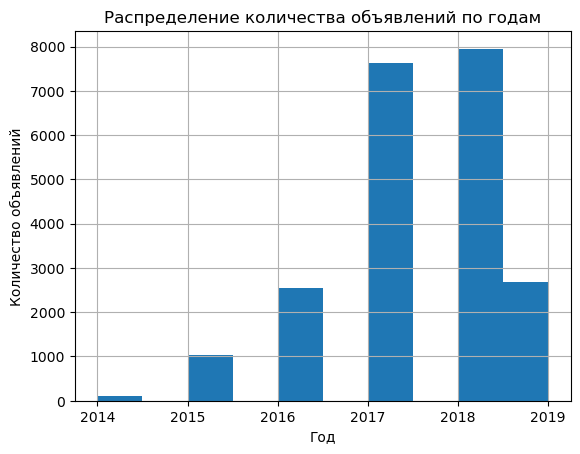

In [123]:
data['year'].hist()#построение гистрограммы
plt.ylabel('Количество объявлений')
plt.xlabel('Год')
plt.title('Распределение количества объявлений по годам')
plt.show()

По изученным данным можно сделать вывод, что на сайте недвижимости был рост пользователей, которые публикуют свои объявления с 2014 по 2018 года. С 2016 года по 2017 произошел большой скачок. В 17 году по сравнению с 16 годом было опубликовано на 5 076 объявлений больше. 

Делать точные выводы о дальнейшем росте публикаций сделать нельзя, так как у нас представлены данные только за 5 месяцев 2019 года. Стоит данный анализ повтроить, когда будут данные за конец 2019 года

### 3.5 Тип этажа

Создадим фильтр, который будет создавать тип этажа («первый», «последний», «другой»). Затем создадим новый столбец, где будут показаны типы этажей в квартире

In [124]:
#создание функции
def categorize_floor(row):
    floor=row['floor']
    floors=row['floors_total']
    if floor == 1:
        return 'первый'
    if floor == floors:
        return 'последний'
    return 'другой'

In [125]:
data['floor_category']=data.apply(categorize_floor,axis=1)# примените функцию методом apply()
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_price_m,day,month,year,floor_category
0,20,13.000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,1,482.0,2,755.0,NaN,12037.0,3,3,2019,другой
1,7,3.350,40.40,2018-12-04,1,2.75,11,18.60,1,False,...,0,NaN,0,584.5,81.0,8292.0,1,12,2018,первый
2,10,5.196,56.00,2015-08-20,2,2.55,5,34.30,4,False,...,1,90.0,2,574.0,558.0,9279.0,3,8,2015,другой
3,10,2.890,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,0,NaN,0,NaN,55.0,9507.0,0,9,2018,другой
4,6,3.700,37.30,2017-11-02,1,2.66,26,10.60,6,False,...,0,733.0,0,593.0,155.0,9920.0,3,11,2017,другой
5,5,7.915,71.60,2019-04-18,2,2.75,24,44.30,22,False,...,0,460.0,0,504.0,NaN,11054.0,3,4,2019,другой
6,20,2.900,33.16,2018-05-23,1,2.70,27,15.43,26,False,...,0,NaN,0,NaN,189.0,8745.0,2,5,2018,другой
7,18,5.400,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,0,460.0,0,504.0,289.0,8852.0,6,2,2017,другой
8,5,5.050,39.60,2017-11-16,1,2.67,12,20.30,3,False,...,1,310.0,2,553.0,137.0,12753.0,3,11,2017,другой
9,9,3.300,44.00,2018-08-27,2,2.55,5,31.00,4,False,...,0,407.0,0,553.0,7.0,7500.0,0,8,2018,другой


### 3.6 Посчитаем и добавим новый столбец, в котором будет показано расстояние до центра города в км..

In [126]:
#создание нового столбца
data['city_centers_km']=round(data['city_centers_nearest']/1000)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_price_m,day,month,year,floor_category,city_centers_km
0,20,13.000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,482.0,2,755.0,NaN,12037.0,3,3,2019,другой,16.0
1,7,3.350,40.40,2018-12-04,1,2.75,11,18.60,1,False,...,NaN,0,584.5,81.0,8292.0,1,12,2018,первый,19.0
2,10,5.196,56.00,2015-08-20,2,2.55,5,34.30,4,False,...,90.0,2,574.0,558.0,9279.0,3,8,2015,другой,14.0
3,10,2.890,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,NaN,0,NaN,55.0,9507.0,0,9,2018,другой,NaN
4,6,3.700,37.30,2017-11-02,1,2.66,26,10.60,6,False,...,733.0,0,593.0,155.0,9920.0,3,11,2017,другой,19.0
5,5,7.915,71.60,2019-04-18,2,2.75,24,44.30,22,False,...,460.0,0,504.0,NaN,11054.0,3,4,2019,другой,12.0
6,20,2.900,33.16,2018-05-23,1,2.70,27,15.43,26,False,...,NaN,0,NaN,189.0,8745.0,2,5,2018,другой,NaN
7,18,5.400,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,460.0,0,504.0,289.0,8852.0,6,2,2017,другой,15.0
8,5,5.050,39.60,2017-11-16,1,2.67,12,20.30,3,False,...,310.0,2,553.0,137.0,12753.0,3,11,2017,другой,14.0
9,9,3.300,44.00,2018-08-27,2,2.55,5,31.00,4,False,...,407.0,0,553.0,7.0,7500.0,0,8,2018,другой,52.0


Мы создали дополнительные таблицы, которые помогут дальше проанализировать данные.

## 4 Исследовательский анализ данных

### 4.1 Изучение и описание других параметров

#### 4.1.1 Изучение общей площади

In [127]:
data['total_area'].value_counts().head(20) #вывод количества публикаций по метражу общей площади в порядке убывания

45.0    405
42.0    360
60.0    340
31.0    328
44.0    314
40.0    309
36.0    277
46.0    274
50.0    273
43.0    272
32.0    269
35.0    255
38.0    231
55.0    217
33.0    217
41.0    216
52.0    215
34.0    213
58.0    212
54.0    211
Name: total_area, dtype: int64

In [128]:
data['total_area'].median() #вычисление медианы 

51.6

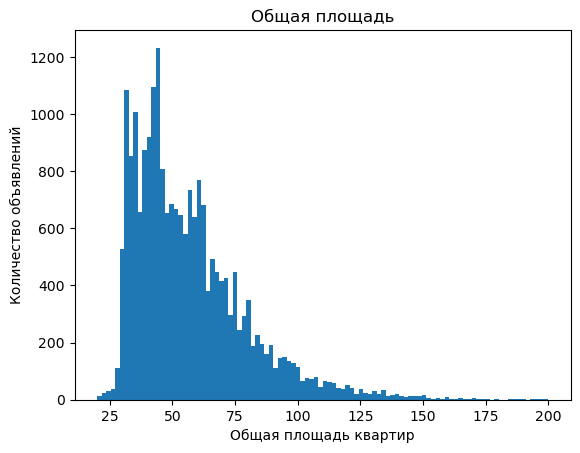

In [129]:
data['total_area'].plot(kind='hist', title='Общая площадь', bins=100)#построение гистрограммы
plt.ylabel('Количество объявлений')
plt.xlabel('Общая площадь квартир')
plt.show()

Из проделанного анализа данных можно сделать вывод, что 25% публикаций с площадью от 31 до 60 кв.м.. Из медианы видно, что из всех квартир чаще всего выставляют на продажу недвижимость с общей площадью 51.6 кв.м..

Объявления, где общая площадь больше 100 кв.м. редки, а после 150 кв.м. единичны. 

#### 4.1.2 Изучение жилой площади

In [130]:
data['living_area'].value_counts().head(20) #вывод количества публикаций по метражу жилой площади в порядке убывания

18.0    921
17.0    705
30.0    638
16.0    473
28.0    466
20.0    457
31.0    398
19.0    326
32.0    321
27.0    318
29.0    299
15.0    298
40.0    234
33.0    228
43.0    227
42.0    226
35.0    203
36.0    193
39.0    184
34.0    184
Name: living_area, dtype: int64

In [131]:
data['living_area'].median() #вычисление медианы 

30.0

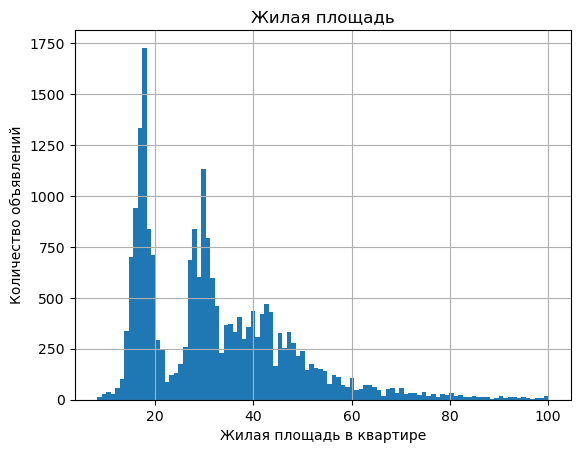

In [132]:
data['living_area'].hist(bins=100)#построение гистрограммы
plt.ylabel('Количество объявлений')
plt.xlabel('Жилая площадь в квартире')
plt.title('Жилая площадь')
plt.show()

Самое большое количество объявлений с жилой площадью в 19 кв.м.. Но при всем этом, проанализировав данные, можно сказать, что чаще всего публикуют квартиры с жилой площадью от 15 до 20 кв.м. и от 27 до 36 кв.м.

#### 4.1.3 Изучение площади кухни

In [133]:
data['kitchen_area'].value_counts().head(20) #вывод количества публикаций по метражу площади кухни в порядке убывания

8.0     3412
6.0     3401
10.0    2918
9.0     2412
7.0     2111
11.0    1772
12.0    1466
14.0     827
13.0     783
15.0     614
5.0      487
16.0     405
17.0     235
18.0     224
20.0     167
19.0     124
22.0     101
25.0      72
21.0      69
24.0      64
Name: kitchen_area, dtype: int64

In [134]:
data['kitchen_area'].mean() #вычисление ср. арифм площади кухни

9.987518790142577

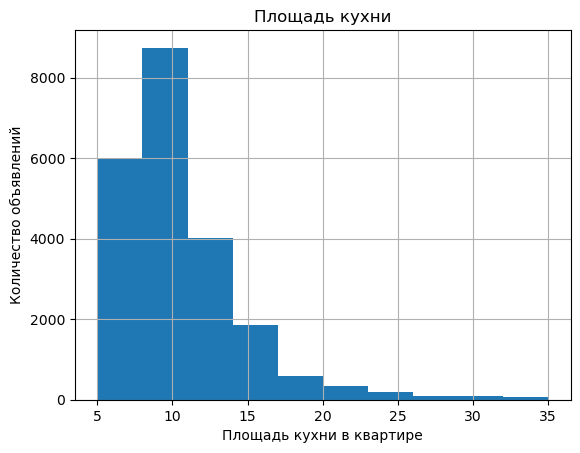

In [135]:
data['kitchen_area'].hist(bins=10)#построение гистрограммы
plt.ylabel('Количество объявлений')
plt.xlabel('Площадь кухни в квартире')
plt.title('Площадь кухни')
plt.show()

80% площадей кухни от 6 до 12 кв.м.. При этом средняя площадь всех объявлений почти 10 кв.м.. 

#### 4.1.4  Изучение цены объекта

In [136]:
data['last_price'].value_counts().head(20) #вывод количества публикаций по цене объекта

4.5    337
3.5    277
4.3    256
4.2    254
4.0    251
3.6    246
3.8    232
3.3    226
3.2    225
4.1    225
5.5    223
3.7    223
3.9    216
3.4    214
4.6    213
3.1    204
5.2    204
5.0    198
4.8    196
5.1    192
Name: last_price, dtype: int64

In [137]:
data['last_price'].mean() #вычисление ср. арифиметического значения цены недвижимости

5.526153611397076

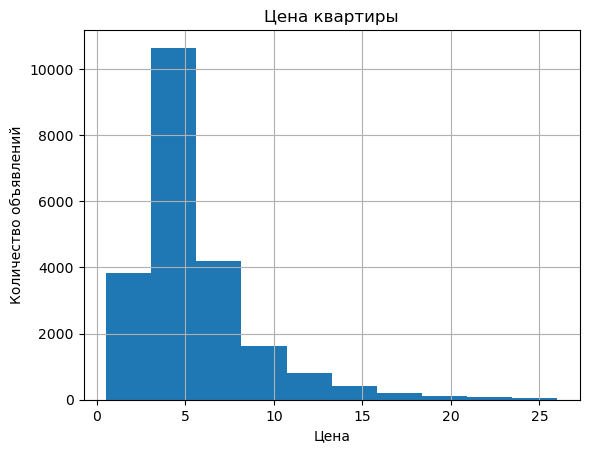

In [138]:
data['last_price'].hist(bins=10)#построение гистрограммы
plt.ylabel('Количество объявлений')
plt.xlabel('Цена')
plt.title('Цена квартиры')
plt.show()

Проанализировав данные, можно сказать, что 84% всей опубликованной недвижимости имеют стоимость от 2 до 8 млн. рублей. При этом больше всего объявлений с ценой в 4 млн. рублей (23% от всех объявлений). Но средний показатель по всем объявлениям 5.5 млн. рублей.

#### 4.1.5  Изучение количества комнат

In [139]:
data['rooms'].value_counts().head(10) #вывод количества публикаций по количеству комнат

1    7652
2    7556
3    5452
4     993
5     182
0      90
6      22
7       6
Name: rooms, dtype: int64

In [140]:
data['rooms'].median() #вычисление медианы

2.0

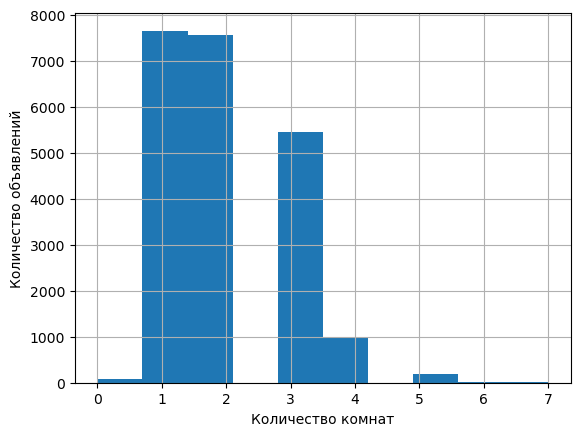

In [141]:
data['rooms'].hist()#построение гистрограммы
plt.ylabel('Количество объявлений')
plt.xlabel('Количество комнат')
plt.show()

По изученным данным можно сказать, что 69% недвижимости с 1 или 2-мя комнатами. 25% недвижимости с 3-мя комнатами. В итоге получаем, что медиана равна двум комнатам.

#### 4.1.6  Изучение высоты потолков

In [142]:
data['ceiling_height'].value_counts().head(10) #вывод количества публикаций по высоте потолков

2.55    4053
2.50    3353
2.70    3090
2.75    2266
2.60    2241
3.00    1753
2.80    1339
2.65    1143
3.20     236
3.10     171
Name: ceiling_height, dtype: int64

In [143]:
data['ceiling_height'].median() #вычисление медианы

2.65

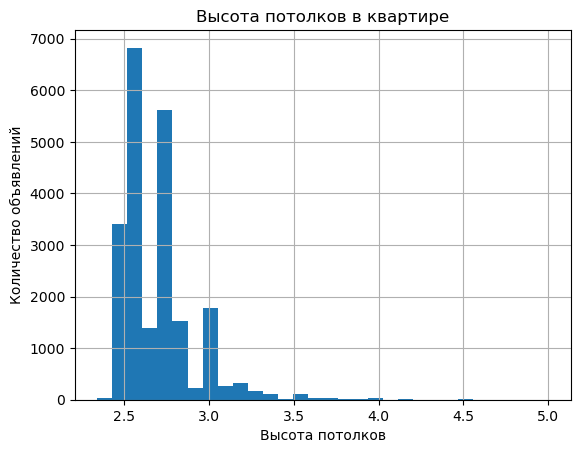

In [144]:
data['ceiling_height'].hist(bins=30)#построение гистрограммы
plt.ylabel('Количество объявлений')
plt.xlabel('Высота потолков')
plt.title('Высота потолков в квартире')
plt.show()

Исходя из полученных данных 34% недвижимости с потолками от 2.5 до 2.55 метров. 24% недвижимости с потолками от 2.7 до 2.75 метров. При этом медианная высота потолков равно 2.65 метрам

#### 4.1.7  Изучение этажности квартир

In [145]:
data['floor'].value_counts().head(10) #вывод количества публикаций по этажности квартир

2     3102
3     2846
1     2713
4     2562
5     2402
6     1204
7     1138
8     1017
9     1008
10     649
Name: floor, dtype: int64

In [146]:
data['floor'].median() #вычисление медианы

4.0

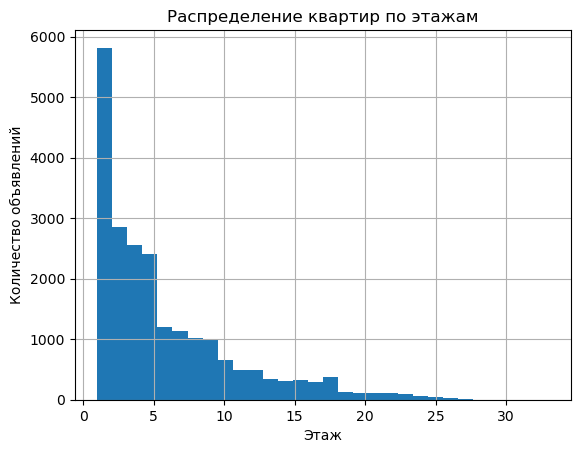

In [147]:
data['floor'].hist(bins=30)#построение гистрограммы
plt.ylabel('Количество объявлений')
plt.xlabel('Этаж')
plt.title('Распределение квартир по этажам')
plt.show()

12% недвижимости находится на первом этаже. Больше всего квартир продается со 2 по 5 этаж (49.7%). При всем этом медианой является 4 этаж. Из этого анализа можно сделать вовод, что чаще всего продают квартиры с 1-го по 5 этаж.

#### 4.1.8 Изучение типа этажей

In [148]:
data['floor_category'].value_counts().head(10) #вывод количества публикаций по типу этажей

другой       16230
последний     3010
первый        2713
Name: floor_category, dtype: int64

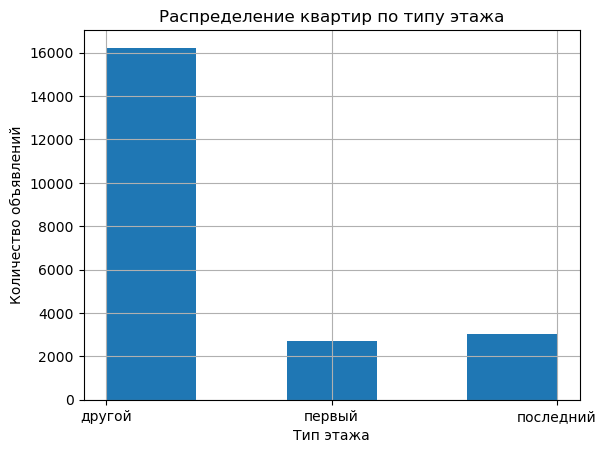

In [149]:
data['floor_category'].hist(bins=5)#построение гистрограммы
plt.ylabel('Количество объявлений')
plt.xlabel('Тип этажа')
plt.title('Распределение квартир по типу этажа')
plt.show()

По данным видно, что 14% занимают квартиры, находящиеся на последнем этаже, 12% квартиры, находящиеся на первом этаже и больше всего квартир, которые расположены на других этажах (74%)

#### 4.1.9  Изучение общего количества этажей

In [150]:
data['floors_total'].value_counts().head(10) #вывод количества публикаций по общему количеству этажей

5     5295
9     3670
16    1315
12    1313
10    1136
4     1076
25    1031
17     797
6      772
3      599
Name: floors_total, dtype: int64

In [151]:
data['floors_total'].median() #вычисление медианы

9.0

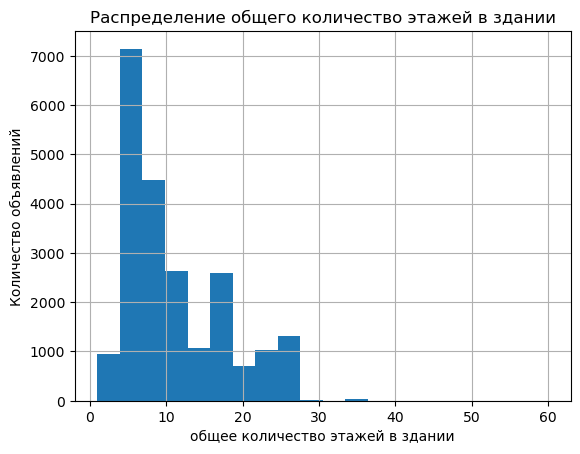

In [152]:
data['floors_total'].hist(bins=20)#построение гистрограммы
plt.ylabel('Количество объявлений')
plt.xlabel('общее количество этажей в здании')
plt.title('Распределение общего количество этажей в здании')
plt.show()

Проанализировав данные, можно сказать, что больше всего объявлений с продажей недвижимости в средних многоэтажках ( от 5 до 10 этажей). Пятиэтажки составляют 24%, девятиэтажки 16.7%, а десятиэтажки 5%. 

6% из всех объявлений занимают многоэтажки с 12-ю и 16-ю этажами.
Из этого можно сделать вывод, что чаще всего продаются квартиры в многоэтажках от 5 до 10 этажей.

#### 4.1.10 Изучение расстояния до  центра города 

In [153]:
data['city_centers_km'].value_counts().head() #вывод количества публикаций по расстоянию до центра города

12.0    1584
15.0    1511
13.0    1415
14.0    1250
16.0    1233
Name: city_centers_km, dtype: int64

In [154]:
data['city_centers_km'].median() #вычисление медианы

13.0

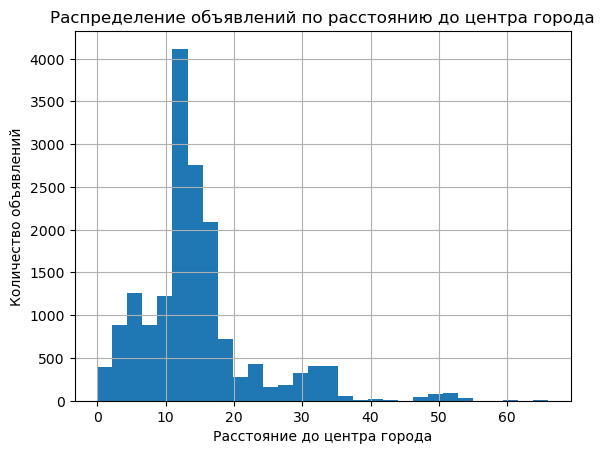

In [155]:
data['city_centers_km'].hist(bins=30)#построение гистрограммы
plt.ylabel('Количество объявлений')
plt.xlabel('Расстояние до центра города')
plt.title('Распределение объявлений по расстоянию до центра города')
plt.show()

По этим данным можно сделать вывод, что 37% объявлений, где растояние до центра города от 11 до 16 км.. Расстояния после 35 км редки и едининчны.

#### 4.1.11  Изучение расстояния до ближайшего аэропорта

In [156]:
data['airports_nearest']=round(data['airports_nearest']/1000) #переводим расстояние до аэропорта в км и округляем

In [157]:
data['airports_nearest'].value_counts().head(10) #вывод количества публикаций по расстоянию до аэропорта

19.0    585
14.0    570
15.0    561
18.0    551
24.0    547
37.0    534
25.0    532
22.0    526
36.0    524
13.0    519
Name: airports_nearest, dtype: int64

In [158]:
data['airports_nearest'].median() #вычисление медианы

27.0

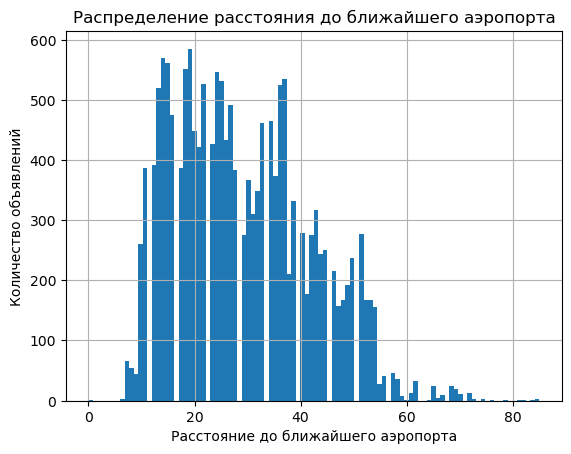

In [159]:
data['airports_nearest'].hist(bins=100)#построение гистрограммы
plt.ylabel('Количество объявлений')
plt.xlabel('Расстояние до ближайшего аэропорта')
plt.title('Распределение расстояния до ближайшего аэропорта')
plt.show()

Исходя из проделанного анализа можно сделать вывод, что чаще всего продают недвижимость с 18 до 23 км.(13.5%) и с 12 до 17 км.(13%). Так же виден рост публикаций недвижимости, которая находится от 33 до 37 км (11% всех публикаций)

#### 4.1.12 Изучение расстояния до ближайшего парка

In [160]:
data['parks_nearest']= round(data['parks_nearest']) #округление значений в столбце 

In [161]:
data['parks_nearest'].value_counts().head(10) #вывод количества публикаций по расстоянию до парка

460.0    7975
733.0     322
393.0     209
400.0     152
367.0     132
435.0     124
407.0     110
294.0      64
441.0      58
392.0      40
Name: parks_nearest, dtype: int64

In [162]:
data['parks_nearest'].median() #вычисление медианы

460.0

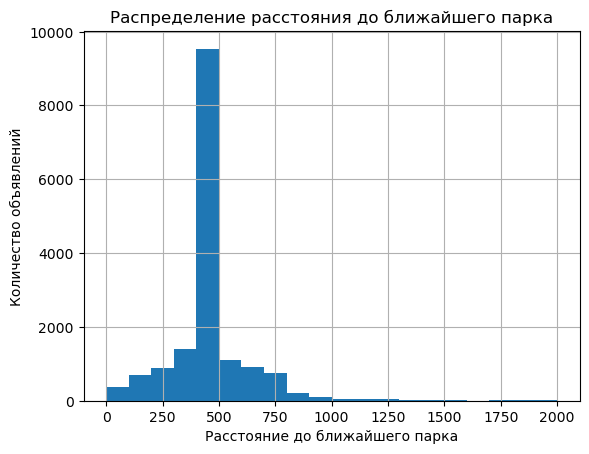

In [163]:
data['parks_nearest'].hist(bins=20, range=(0,2000))#построение гистрограммы
plt.ylabel('Количество объявлений')
plt.xlabel('Расстояние до ближайшего парка')
plt.title('Распределение расстояния до ближайшего парка')
plt.show()

Проанализировав данные и гистрограмму, можно сказать ,что около 36% всей недвижимости находится в 460 метрах от парка. 

#### 4.1.13 Изучение дней публикации объявлений

In [164]:
data['day'].value_counts().head(10)

3    3958
1    3874
4    3734
2    3664
0    3339
5    1807
6    1577
Name: day, dtype: int64

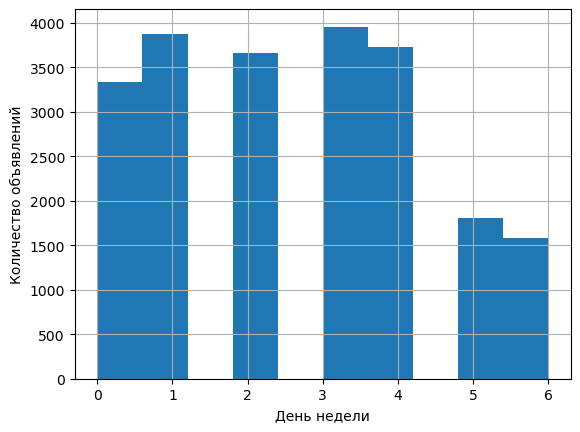

In [165]:
data['day'].hist(bins=10, range=(0,6))#построение гистрограммы
plt.ylabel('Количество объявлений')
plt.xlabel('День недели')
plt.show()

Из проделанного анализа можно сделать вывод, что 85% людей публикую объявления о продаже недвижимости в будние дни, остальные (15%) публикуют в выходные. Чаще всего в четверг делаются новые публикации


#### 4.1.14 Изучение месяцев публикации объявлений

In [166]:
data['month'].value_counts().head(10)

2     2451
3     2405
11    2220
4     2196
10    1974
9     1847
6     1637
8     1608
7     1547
12    1512
Name: month, dtype: int64

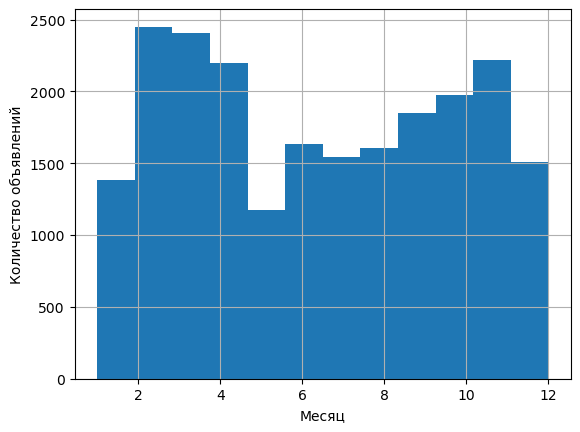

In [167]:
data['month'].hist(bins=12)#построение гистрограммы
plt.ylabel('Количество объявлений')
plt.xlabel('Месяц')
plt.show()

По месяцам лидирующие позиции по публикации объявлений занимают февраль и март. На эти месяцы приходится 22% всех публикуемых объявлений. Реже всего публикуют новые объявления в июле и декабре, что скорее всего связано с отпусками(июль) и подготовкой к праздникам (декабрь).

### 4.2  Изучим как быстро продавались квартиры. Для этого построим гистрограмму, а затем посчитаем среднее и медиану

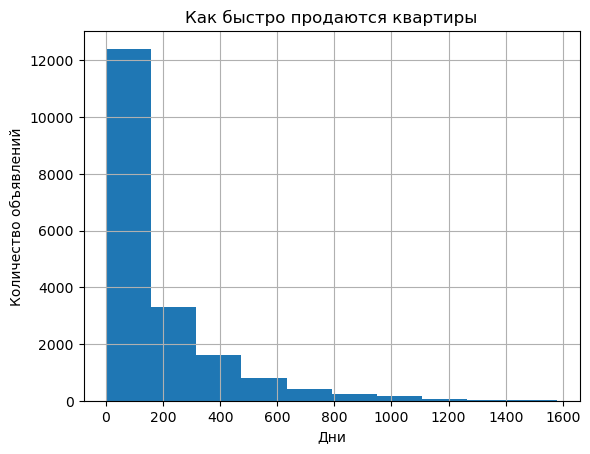

In [168]:
data['days_exposition'].hist(bins=10)
plt.xlabel('Дни')
plt.ylabel('Количество объявлений')
plt.title('Как быстро продаются квартиры')
plt.show()

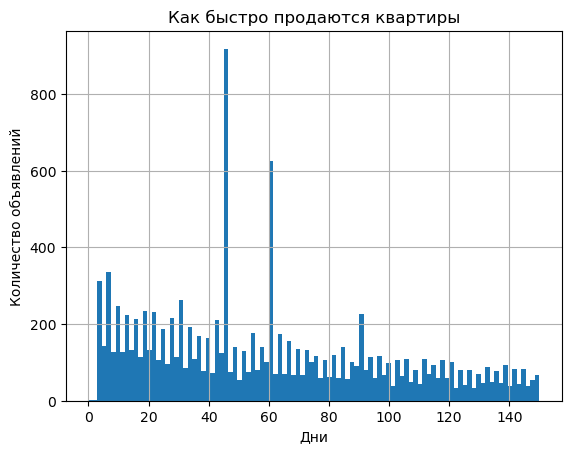

In [169]:
data['days_exposition'].hist(bins=100,range=(0,150))
plt.xlabel('Дни')
plt.ylabel('Количество объявлений')
plt.title('Как быстро продаются квартиры')
plt.show()

In [170]:
print(data['days_exposition'].mean())
data['days_exposition'].median()

177.99580712788259


94.0

In [171]:
data['days_exposition'].value_counts().head(10)

45.0    834
60.0    522
7.0     218
30.0    199
4.0     164
90.0    160
3.0     147
5.0     142
20.0    131
14.0    131
Name: days_exposition, dtype: int64

Из гистрограмм можно сделать вывод, что чаще всего продается недвижимость через 45 и 60 дней после публикации. Но при этом ср. арифметическое равно 178 дням, а медиана 94 дням.

Так как у нас не хватает около 3 000 данных по дням за 2019 год. Лучше провести повторный анализ данных, за весь 2019 год.

### 4.3  Изучим какие факторы больше всего влияют на общую (полную) стоимость объекта.

Изучим как меняется цена в зависимости от общей площади

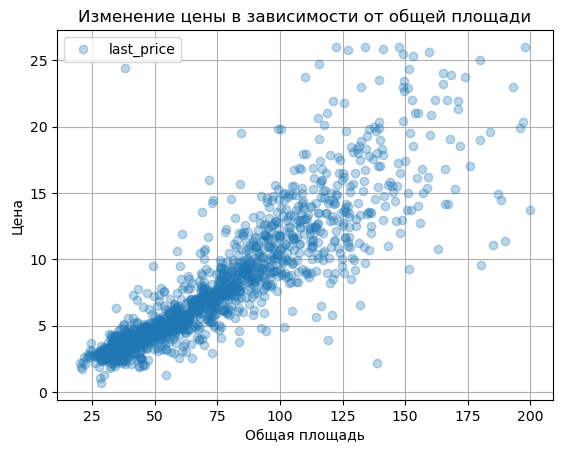

In [172]:
price_total_area=data.pivot_table(index='total_area', values='last_price', aggfunc='mean')
price_total_area.plot(style='o', grid=True, alpha= 0.3)
plt.xlabel('Общая площадь')
plt.ylabel('Цена')
plt.title('Изменение цены в зависимости от общей площади')
plt.show()

Судя по графику изменение идет равномерно, то есть с ростом площади увеличивается стоимость недвижимости.

Изучим как меняется цена в зависимости от жилой площади

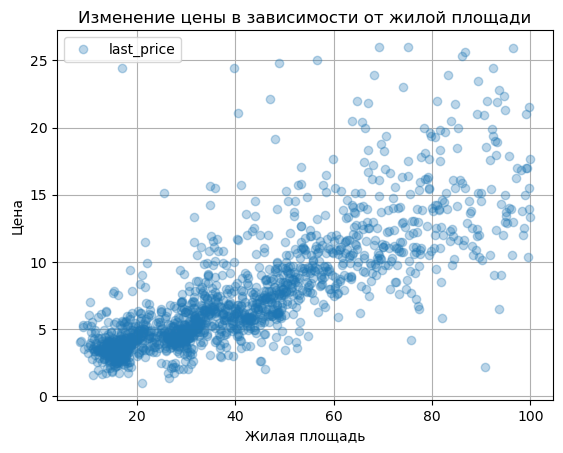

In [173]:
price_living_area=data.pivot_table(index='living_area', values='last_price', aggfunc='mean')
price_living_area.plot(style='o', grid=True,alpha= 0.3)
plt.xlabel('Жилая площадь')
plt.ylabel('Цена')
plt.title('Изменение цены в зависимости от жилой площади')
plt.show()

Судя по графику изменение идет равномерно, то есть с ростом жилой площади увеличивается стоимость недвижимости, но при этом рост идет плавнее, чем рост общей площади

Изучим как меняется цена в зависимости от площади кухни

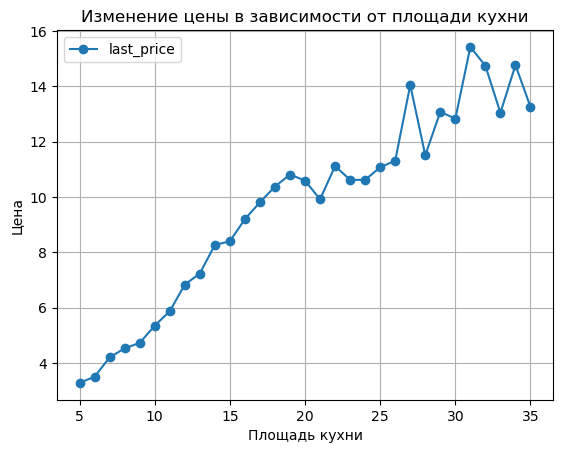

In [174]:
price_kitchen_area=data.pivot_table(index='kitchen_area', values='last_price', aggfunc='mean')
price_kitchen_area.plot(style='o-', grid=True)
plt.xlabel('Площадь кухни')
plt.ylabel('Цена')
plt.title('Изменение цены в зависимости от площади кухни')
plt.show()

До 19 кв.м. кухни идет равномернный рост цены, а после зависимость идет зигзагом. Все равно мы можежм сделать вывод,что цена недвижимости зависит от площади кухни

Изучим как влияет количество комнат на цену

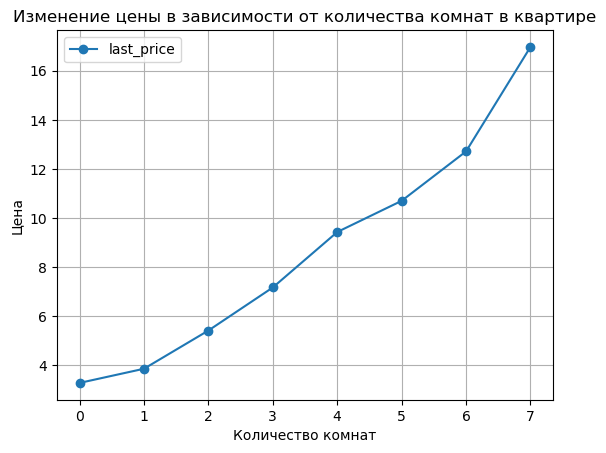

In [175]:
price_rooms=data.pivot_table(index='rooms', values='last_price', aggfunc='mean')
price_rooms.plot(style='o-', grid=True)
plt.xlabel('Количество комнат')
plt.ylabel('Цена')
plt.title('Изменение цены в зависимости от количества комнат в квартире')
plt.show()

Здесь по графику видно, что идет равномерный рост, значит цена недвижимости зависит и от количества комнат. Корреляция положительная

Изучим как влияет этажность на цену

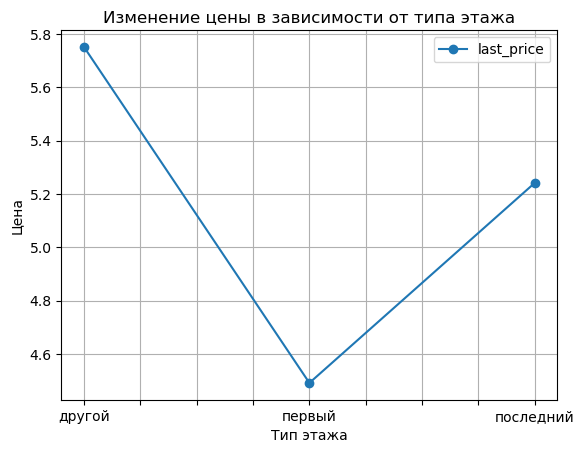

In [176]:
price_floor=data.pivot_table(index='floor_category', values='last_price', aggfunc='mean')
price_floor.plot(style='o-', grid=True)
plt.xlabel('Тип этажа')
plt.ylabel('Цена')
plt.title('Изменение цены в зависимости от типа этажа')
plt.show()

На графике видно, что стоимость недвижимости зависит от типа этажа. Самые дешевые варианты находятся на первом этаже

Изучим как меняется цена в зависимости от дня недели публикации

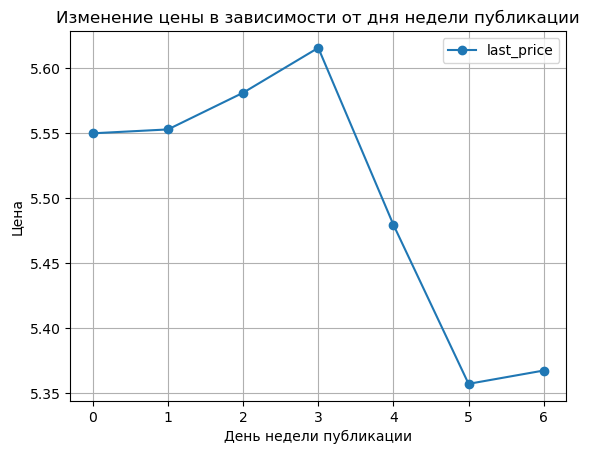

In [177]:
price_day=data.pivot_table(index='day', values='last_price', aggfunc='mean')
price_day.plot(style='o-', grid=True)
plt.xlabel('День недели публикации')
plt.ylabel('Цена')
plt.title('Изменение цены в зависимости от дня недели публикации')
plt.show()

По диаграмме видно, что объявления которые выставляют с субботы по воскресенье имеют самую маленькую стоимость, а люди, которые выкладывают публикацию в будний день ставят цену больше.

Изучим как меняется цена в зависимости от месяца публикации

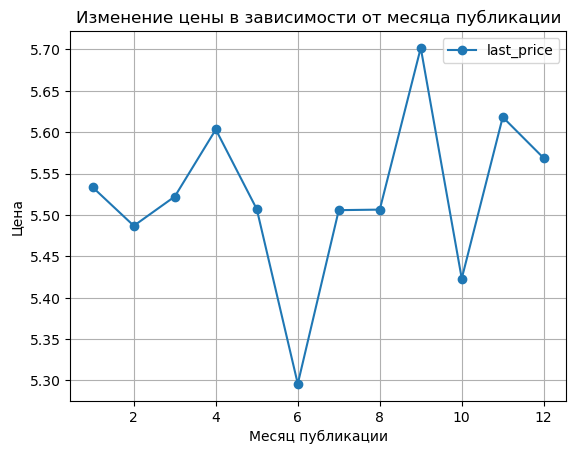

In [178]:
price_month=data.pivot_table(index='month', values='last_price', aggfunc='mean')
price_month.plot(style='o-', grid=True)
plt.xlabel('Месяц публикации')
plt.ylabel('Цена')
plt.title('Изменение цены в зависимости от месяца публикации')
plt.show()

Данный график идет зигзагом в зависимости от месяца публикации. При этом можно сделать вывод, что меньше всего цена на недвижимость, которую выложили в июне, потом наименьшая стоимость в октябре

Изучим как меняется цена в зависимости от года публикации

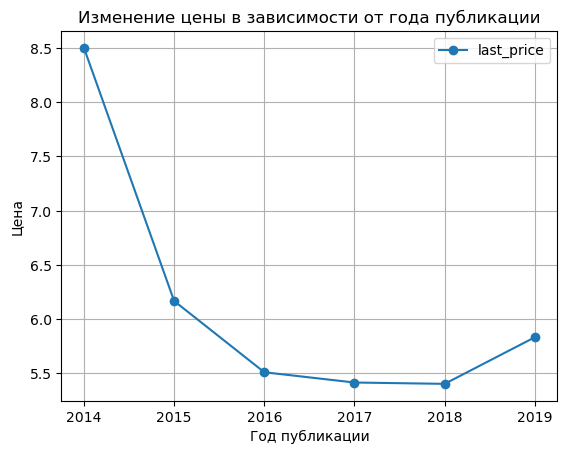

In [179]:
price_year=data.pivot_table(index='year', values='last_price', aggfunc='mean')
price_year.plot(style='o-', grid=True)
plt.xlabel('Год публикации')
plt.ylabel('Цена')
plt.title('Изменение цены в зависимости от года публикации')
plt.show()

По графику видна зависимость цены от года. Скорее всего цена зависит не от самого года, а от экономической обстановки в стране. Так в 2014 году на Россию наложили множество санкций. А с 2014 по 2015 года был валютный кризис в стране. Поэтому на графике видно как меняется цена в зависимости от экономической обстановки.

### 4.4  Какая средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [180]:
top_locality_name=data.pivot_table(index='locality_name', values='one_price_m', aggfunc=['count','mean'])
#построение сводной таблицы

In [181]:
top_locality_name.columns=['count','mean']#переименование столбцов

In [182]:
top_locality_name.sort_values('count', ascending=False).head(10)#вывод 10 городов с наибольшим числом объявлений

,count,mean
locality_name,,
Санкт-Петербург,14529,10955.346617
Мурино,520,8517.288462
Кудрово,430,9475.467442
Шушары,425,7837.623529
Всеволожск,390,6891.723077
Колпино,327,7538.015291
Пушкин,326,10284.690184
Парголово,325,9023.686154
Гатчина,278,6917.658273


66% всех объявлений в Ленинградской области приходится на Санкт-Петербург. Что ожидаемо, так как это самый крупный город в этой области, так же в Питере самая высокая цена за 1кв.м. (10 955 рублей). Самая низкая цена в Выборге- 5 793 рубля за 1 кв.м..

### 4.5  Как меняется стоимость квартиры в Санкт-Петербурге в зависимости от расстояния до центра города

In [183]:
spb=data.query('locality_name =="Санкт-Петербург"').reset_index(drop=True)# создание новой таблицы с данными за Питер

In [184]:
spb1=spb.pivot_table(index='city_centers_km', values='last_price', aggfunc='mean') 
#создание новой таблицы по км,где указана ср.арифм цена
spb1

,last_price
city_centers_km,
0.0,9.606154
1.0,10.797181
2.0,10.278774
3.0,9.033763
4.0,9.586227
5.0,9.838091
6.0,8.904382
7.0,8.314991
8.0,8.347565


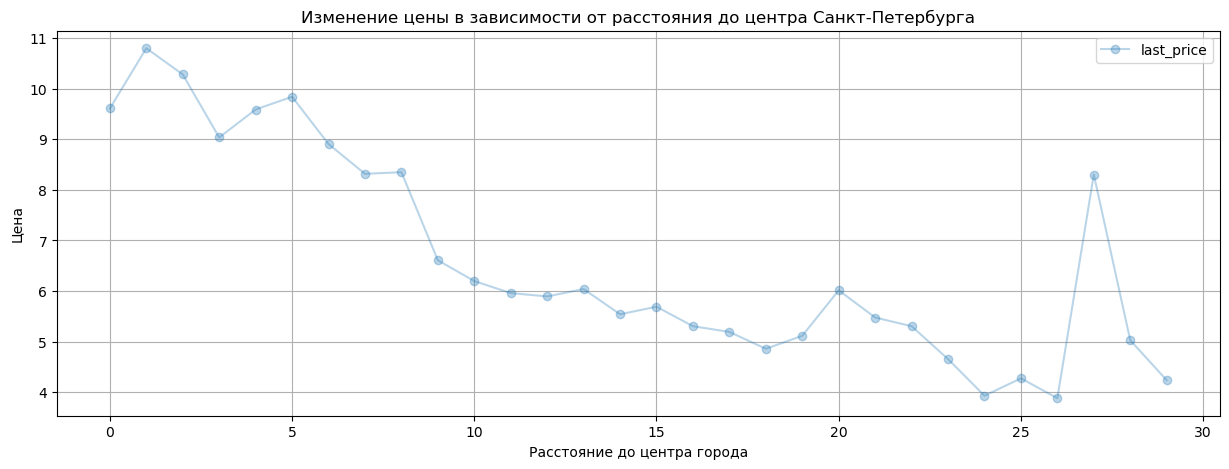

In [185]:
spb1.plot(y='last_price', style='o-', grid=True, alpha=0.3, figsize=(15,5))#создание графика
plt.xlabel('Расстояние до центра города')
plt.ylabel('Цена')
plt.title('Изменение цены в зависимости от расстояния до центра Санкт-Петербурга')
plt.show()

Проведя анализ можно сделать вывод, что есть зависимость цены от расстояния до центра. Чем дальше от центра продается недвижимость, тем она дешевле. Так же мы видим, что больше всего продается квартир в 5 км от центра города со средней стоимостью в 9 млн. 850 тыс. рублей. Еще на графике виден резкий рост цена на 27 км от центра города. Это может быть связано с тем,что на этом расстоянии находится Дворцово-парковый ансамбль Стрельны. Что является историческим местом, поэтому стоимость жилья в нем выше, чем в ближайшие километры.

## 5  Общий вывод

Был проделан большой анализ данных по выгрузке публикаций о продаже недвижимости через сервис Яндекс Недвижимость с 2014 года по май 2019 года.

В первых двух блоках работы мы изучили данные, убрали аномалии, неявные дубликаты и пропуски.  У нас остались пропуски в days_exposition, airports_nearest, city_centers_nearest, parks_nearest и pond_nearest. К сожалению, их убрать нельзя, так как потеряем значительное количество данных, заменить их тоже не получится из-за отсутствия нужных данных, поэтому мы оставили их без заполнения.

Так же во втором блоке мы убрали аномальные значения в столбцах, чтоб проделать дальнейший анализ данных по среднестатистическим показателям.

В последнем блоке нашей работы мы изучили разные параметры. Из них можно сделать вывод какие чаще всего встречаются квартиры в Ленинградской области. По итогу в Ленинградской области среднестатистическая недвижимость продается с такой характеристикой:
- общая площадь 51.6 кв.м.;
- жилая площадь 30 кв.м.;
- площадь кухни 9,9 кв.м.;
- количество комнат равно двум;
- высота потолков 2.65 метра;
- цена объекта 5.5 млн рублей;
- этаж квартиры 4;
- общее количество этажей 9;
- расстояние до центра города 13 км.;
- расстояние до аэропорта 27 км.;
- расстояние до парка ближайшего 460 метров;
- объявление опубликовано в будний день в феврале или марте..

Так же мы изучили влияние разных факторов на формирование цены. И к таким факторам относятся:
- общая и жилая площади;
- площадь кухни;
- этаж;
- количество комнат;
- расстояние до центра города;
- населенный пункт;
- год, а если говорить точнее, то экономическая ситуация в стране. В кризисные времена цены на недвижимость растут.

Из этого можно сделать вывод, что самый дешевый вариант можно было найти в Ленинградской области в Выборге на 1 этаже, с общей площадью в 22 кв.м., с жилой площадью в 10 кв.м., с площадью кухни в 5 кв.м., с одной комнатой. При этом если выложили публикацию в июне 2016,2017 или 2018 года. 

Самый дорогой вариант можно было найти в 2014 году в Санкт-Петербурге с общей площадью от 125 кв.м., с жилой площадью от 75 кв.м., с площадью кухни от 30 кв.м., с семью комнатами, на любом этаже , кроме первого и последнего, в радиусе 5 км от центра города.

Подводя итог всей работы можно с уверенностью говорить, что на формирование цены на недвижимость влияет множество факторов. Так же, чтобы точно проанализировать сколько требуется времени для продажи недвижимости, нам нужны все данные за весь 2019 год.